In [1]:
diseases_df <- read.table("diseases_df.txt", sep=",", header=TRUE, row.names=1)
colnames(diseases_df)

[1] "alzheimers"              "asthma"                 
[3] "coronaryatherosclerosis" "hypertension"           
[5] "hernia"                  "osteoarthrosis"

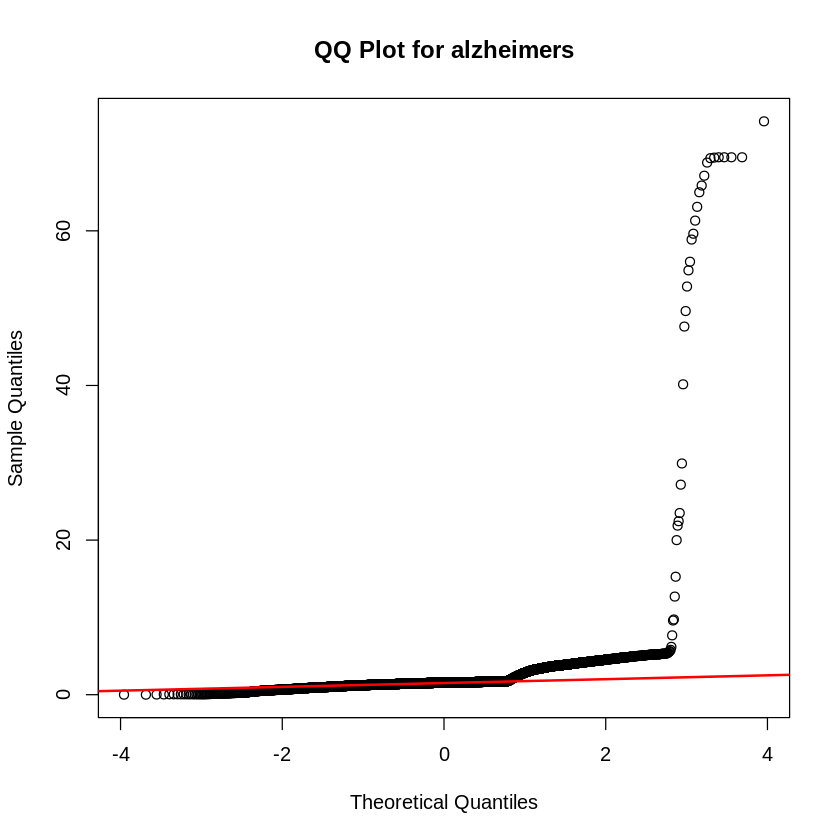

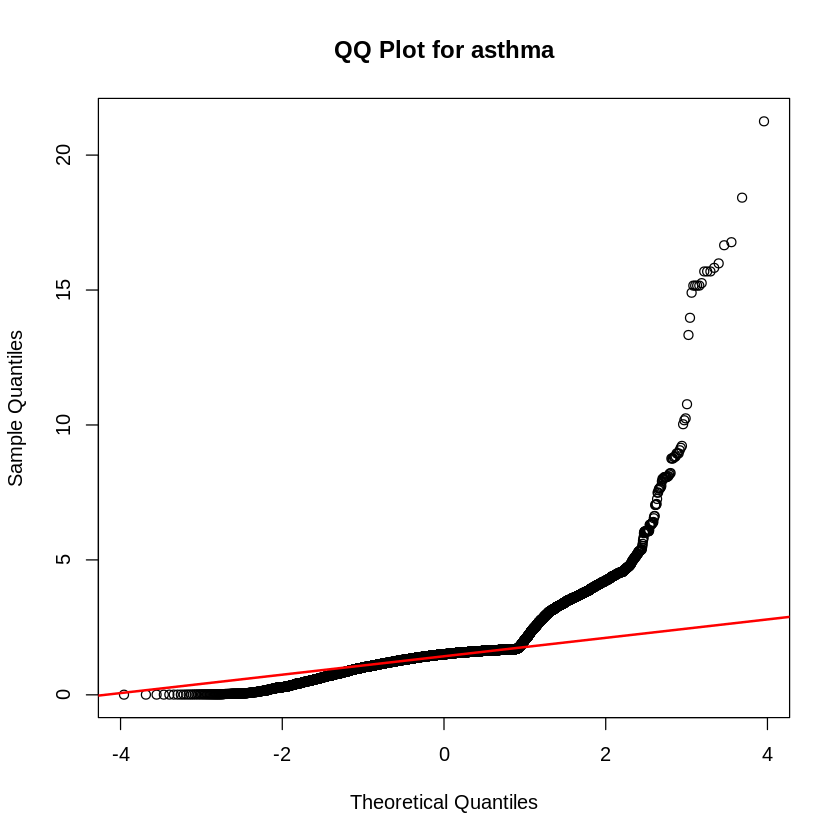

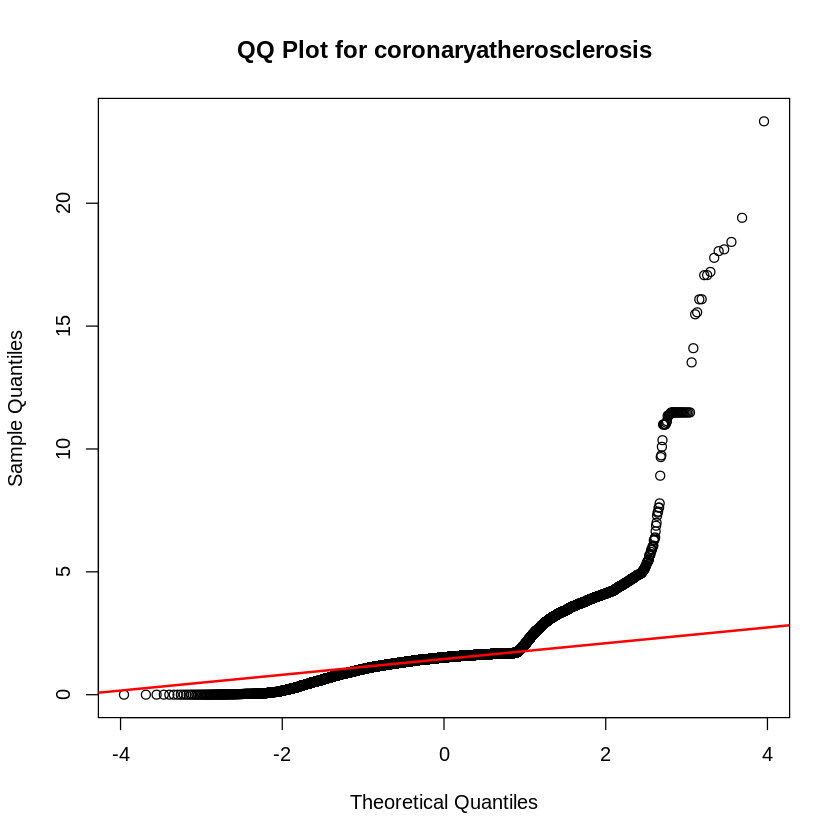

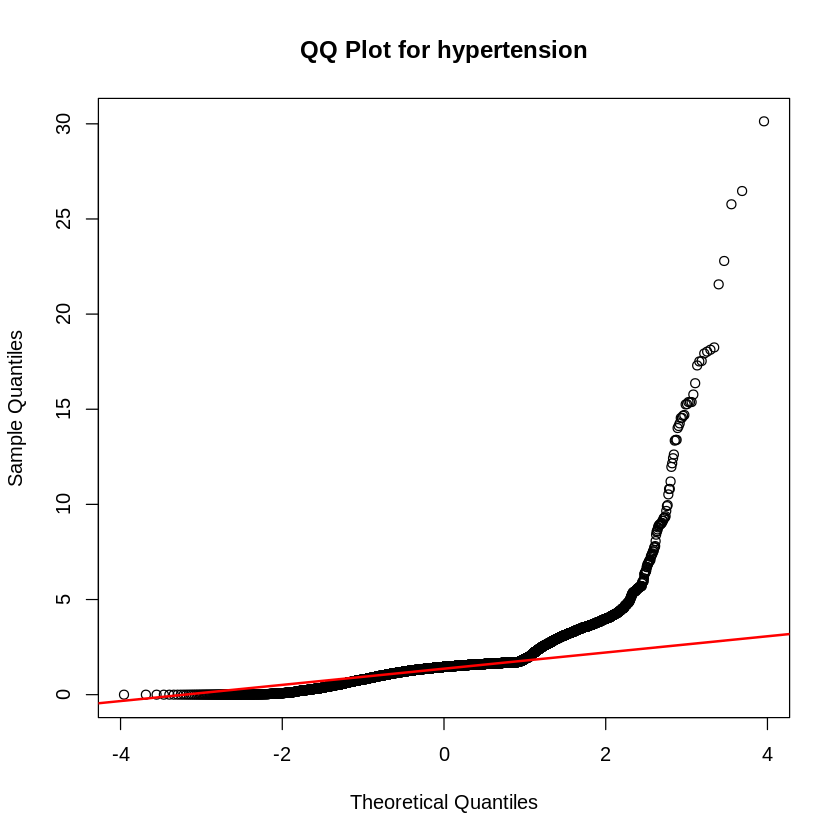

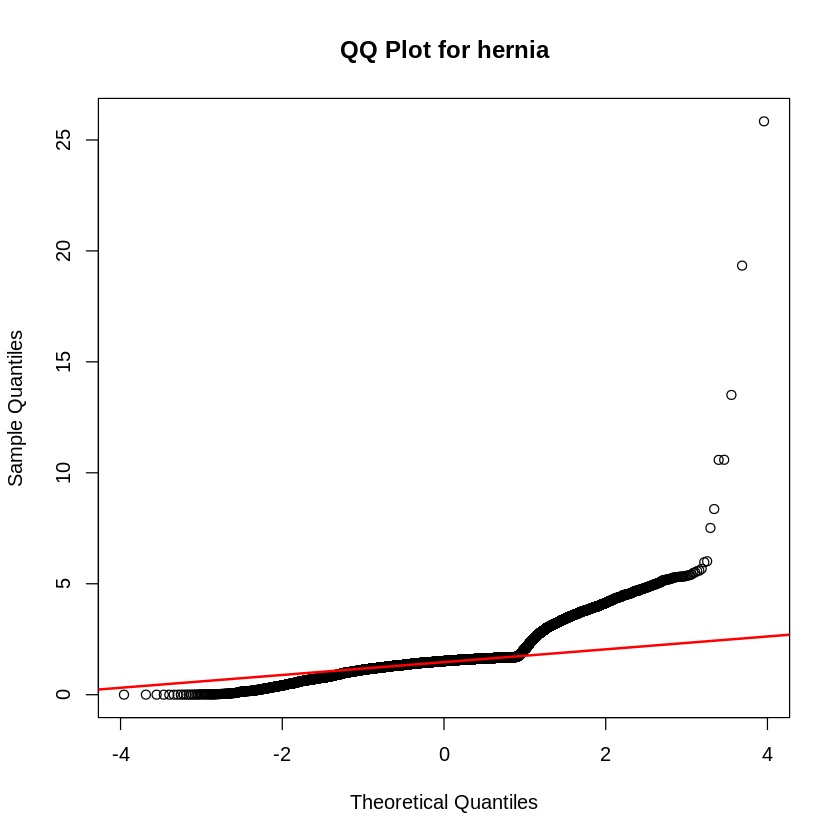

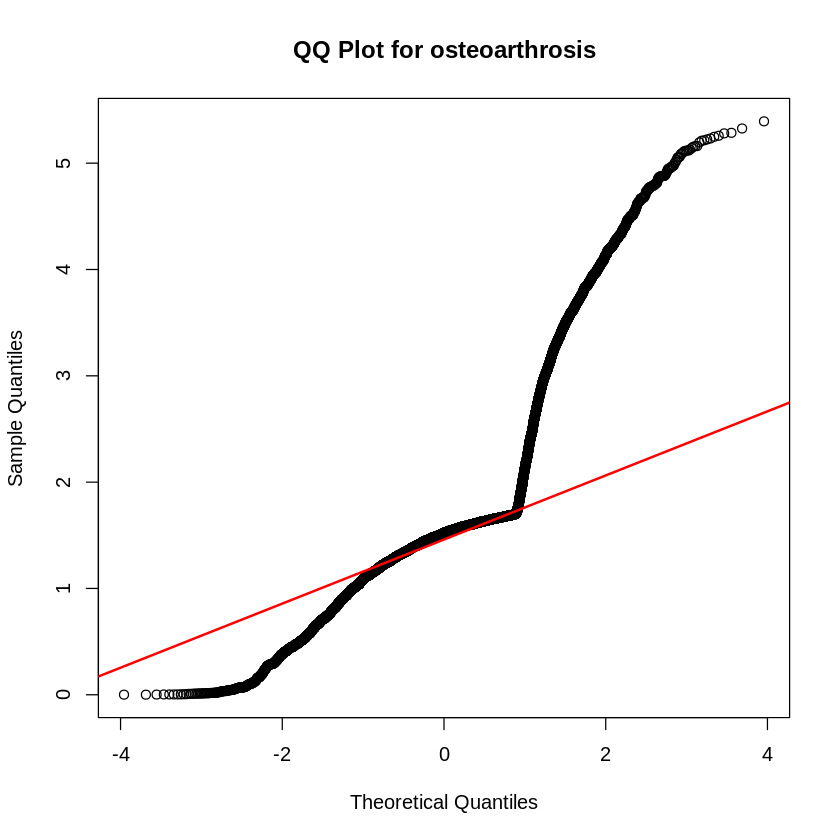

In [2]:
for (col in colnames(diseases_df)) {
  qq <- qqnorm(-log10(diseases_df[[col]]), main = paste("QQ Plot for", col))
  qqline(-log10(diseases_df[[col]]), col = "red", lwd = 2)
  #print(qq)
}

In [3]:
#extract likely causal variants
diseases_df_sub <- apply(diseases_df, 2, function(x) ifelse(x > 0.1, x, NA))

In [4]:
for (col in colnames(diseases_df)) {
  print(quantile(diseases_df[[col]], probs = 0.95, na.rm = TRUE))
  #print(qq)
}

      95% 
0.1300602 
     95% 
0.290769 
      95% 
0.3284281 
      95% 
0.5297777 
      95% 
0.2072926 
      95% 
0.2558535 


In [5]:
# Subset each column with the respective cutoff value
subset_columns <- lapply(seq_along(diseases_df), function(i) {
  column <- diseases_df[[i]]
  cutoff <- quantile(diseases_df[[col]], probs = 0.95, na.rm = TRUE)
  column[column <= cutoff] <- NA
  column
})

# Convert the list of subset columns to a dataframe
subset_df <- as.data.frame(subset_columns)
names(subset_df) <- colnames(diseases_df)
rownames(subset_df) <- rownames(diseases_df)

In [6]:
dim(subset_columns)
length(rownames(diseases_df))

NULL

[1] 13195

In [7]:
#install.packages("pcaMethods")
library(pcaMethods)

# Perform PCA with handling missing values
pca_result <- pcaNipals(subset_df, naMethod = "NULL", scale = TRUE)

# Summary of PCA results
summary(pca_result)

ERROR: Error in library(pcaMethods): there is no package called ‘pcaMethods’


In [ ]:
# Biplot of PCA results
biplot(pca_result)